
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [2]:
import pandas as pd 
import numpy as np 


In [3]:
db = pd.read_csv("framingham.csv")

In [4]:
db.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
db.describe().sum()

male               4242.924272
age                4547.153131
education          4148.999235
currentSmoker      4242.994128
cigsPerDay         4321.928399
BPMeds             4188.199160
prevalentStroke    4241.082465
prevalentHyp       4242.773412
diabetes           4241.183988
totChol            5977.290807
sysBP              5161.887899
diaBP              4772.308154
BMI                4399.730641
heartRate          4739.904329
glucose            4627.917990
TenYearCHD         4241.510840
dtype: float64

**Data Cleaning**

<Axes: xlabel='glucose', ylabel='Count'>

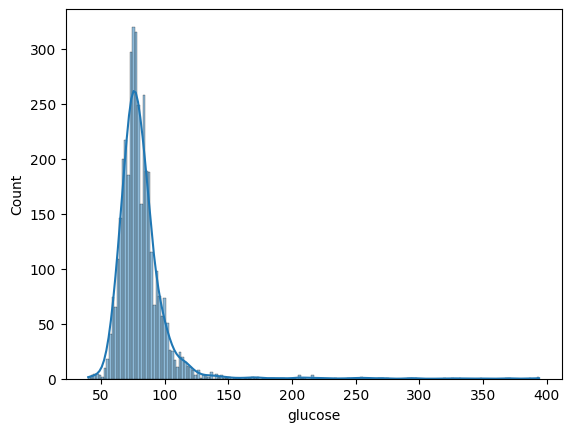

In [7]:
import seaborn as sns
sns.histplot(db['glucose'], kde=True)

In [8]:
db.shape

(4240, 16)

In [9]:
db['glucose'].skew()

np.float64(6.2149483495346765)

By checking curves of all columns that contain missing values , we arrive on conclusion that :
1) education , BPMeds are categorical data , so we fill nan values with mode and correct the format of BPmeds from float to int.
2) heartRate have only one nan value so we drop the corresponding row.
3) glucose , cigsPerDay have a skewed curve so nan values relaced by median .
4) totChol , BMI have a rather sysmetric curve so we relplace NAN by mean instead .

In [10]:
db['education'] = db['education'].fillna(db['education'].mode().iloc[0])
db['BPMeds'] = db['BPMeds'].fillna(db['BPMeds'].mode().iloc[0])



In [11]:
db['education'] = db['education'].astype(int)
db['BPMeds'] = db['BPMeds'].astype(int)


In [12]:
db = db.dropna(subset=['heartRate'])

In [13]:
db['glucose'] = db['glucose'].fillna(db['glucose'].median())
db['cigsPerDay'] = db['cigsPerDay'].fillna(db['cigsPerDay'].median())

In [14]:
db['totChol'] = db['totChol'].fillna(db['totChol'].mean())
db['BMI'] = db['BMI'].fillna(db['BMI'].mean())

In [23]:
db['diaBP'].nunique()

146

In [16]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4239 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4239 non-null   int64  
 1   age              4239 non-null   int64  
 2   education        4239 non-null   int64  
 3   currentSmoker    4239 non-null   int64  
 4   cigsPerDay       4239 non-null   float64
 5   BPMeds           4239 non-null   int64  
 6   prevalentStroke  4239 non-null   int64  
 7   prevalentHyp     4239 non-null   int64  
 8   diabetes         4239 non-null   int64  
 9   totChol          4239 non-null   float64
 10  sysBP            4239 non-null   float64
 11  diaBP            4239 non-null   float64
 12  BMI              4239 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          4239 non-null   float64
 15  TenYearCHD       4239 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 563.0 KB


**Data Visualisation**

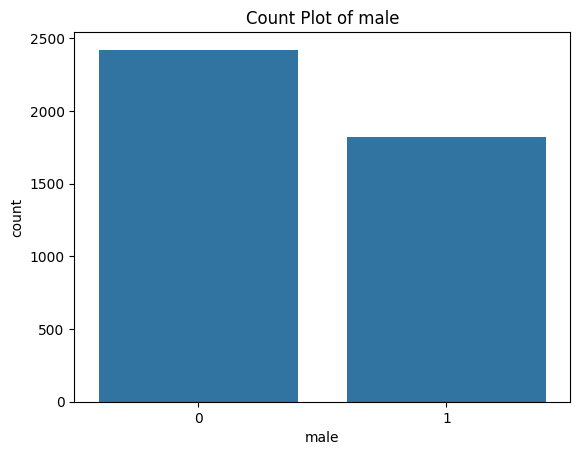

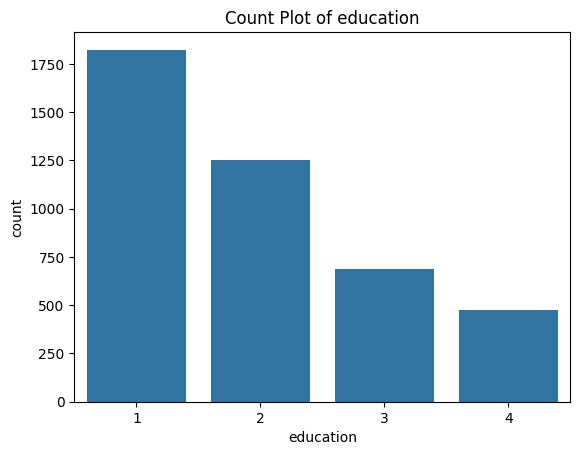

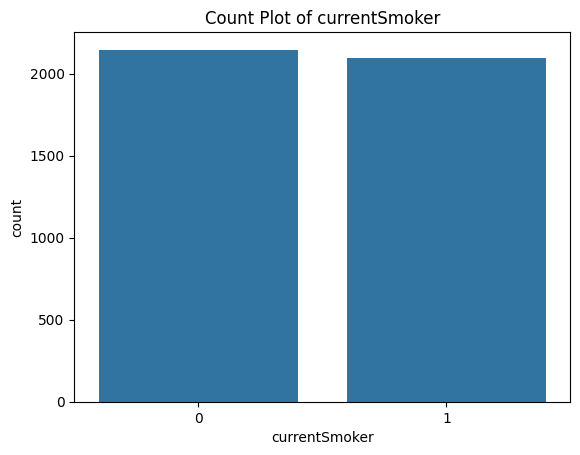

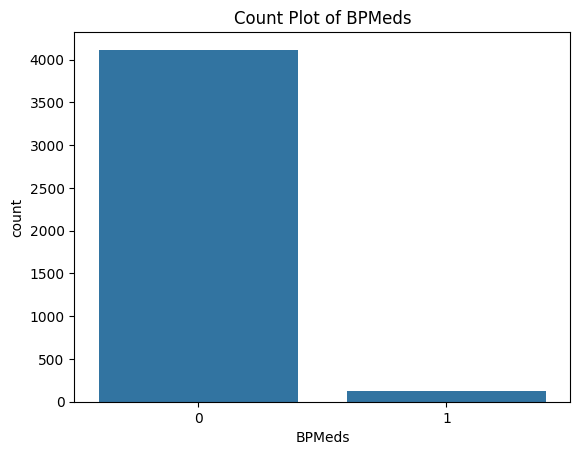

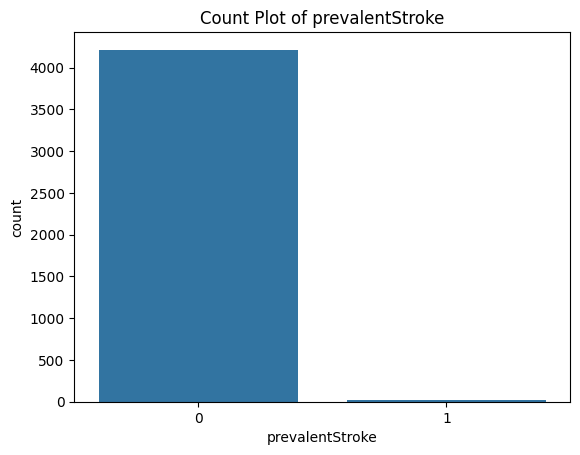

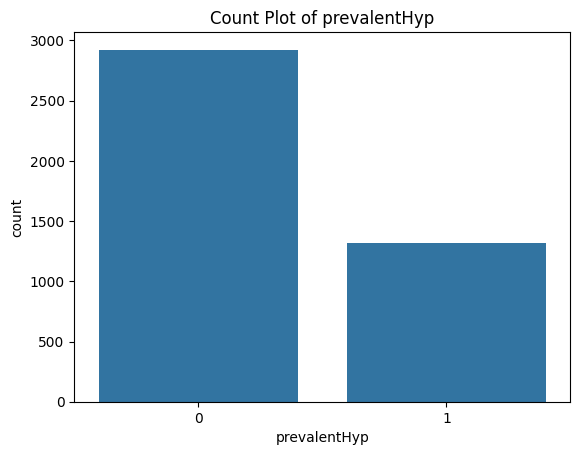

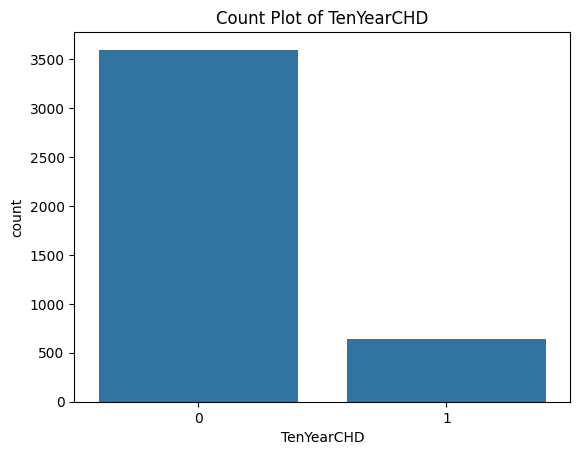

In [17]:
import matplotlib.pyplot as plt 
categorical_cols=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','TenYearCHD','diabetes'] 
for col in categorical_cols:
    sns.countplot(data=db, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks()
    plt.show()

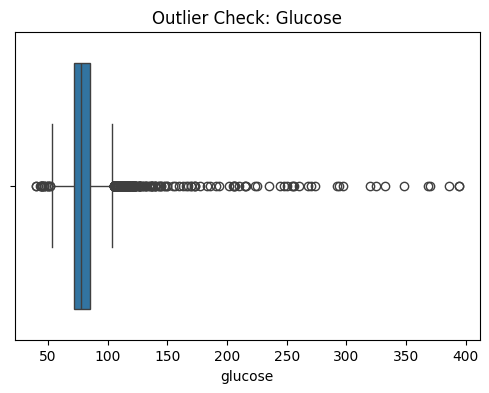

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=db['glucose'])
plt.title("Outlier Check: Glucose")
plt.show()

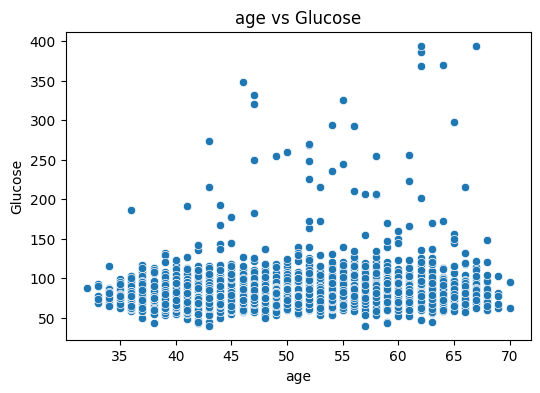

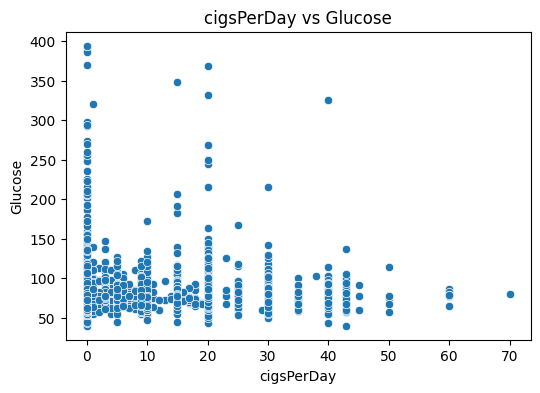

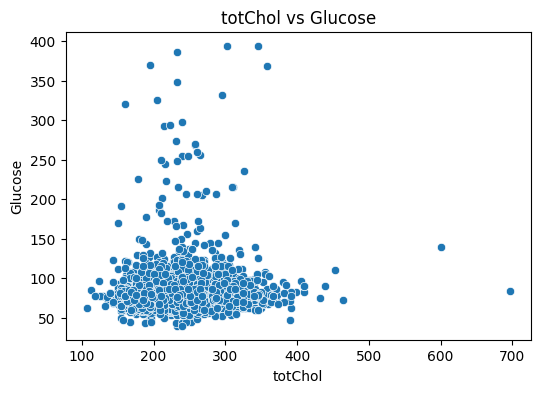

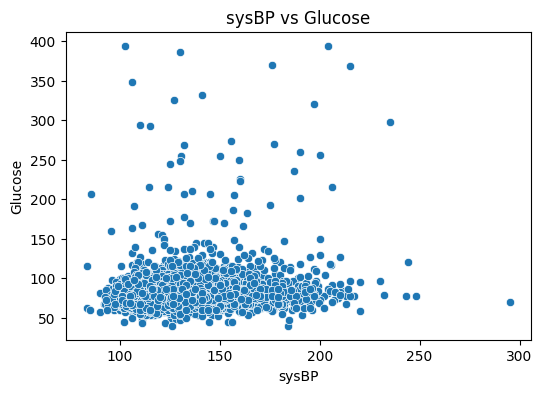

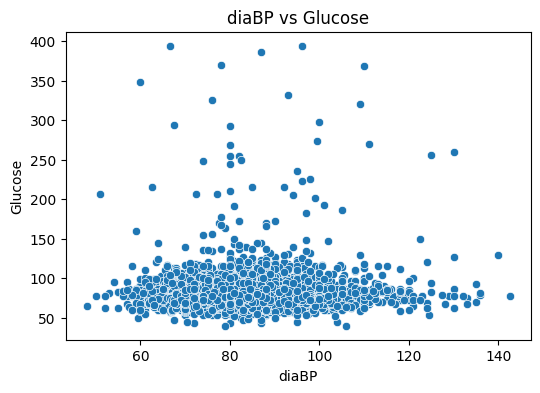

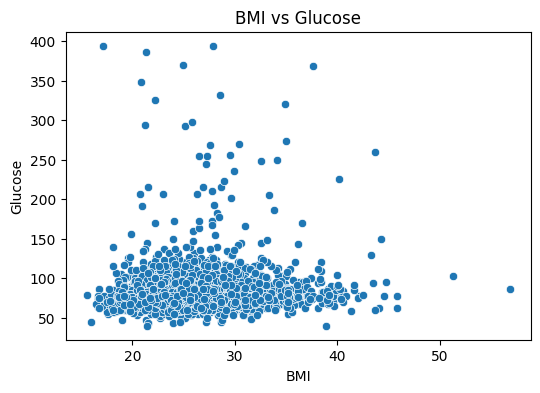

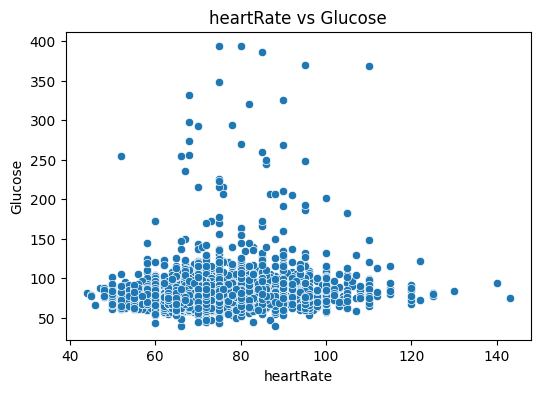

In [24]:

numerical_cols=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate']
for col in numerical_cols:
    if col != 'glucose':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=db[col], y=db['glucose'])
        plt.title(f'{col} vs Glucose')
        plt.xlabel(col)
        plt.ylabel('Glucose')
        plt.show()

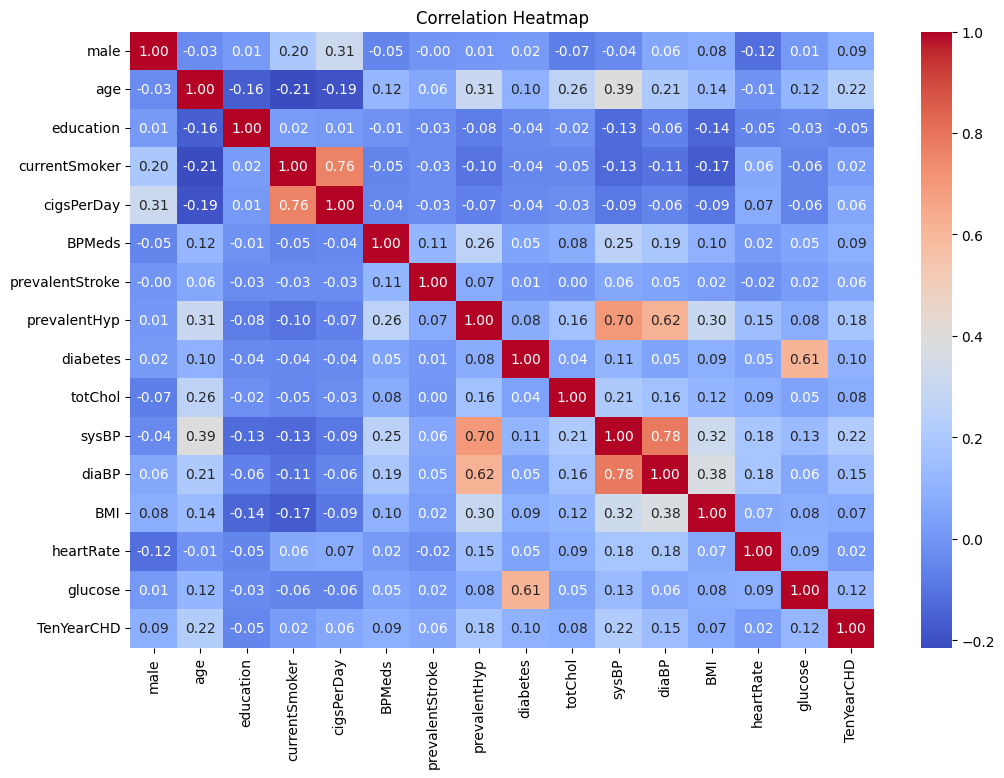

glucose            1.000000
diabetes           0.606525
sysBP              0.134970
TenYearCHD         0.121172
age                0.117757
heartRate          0.087371
prevalentHyp       0.083285
BMI                0.082265
diaBP              0.058968
BPMeds             0.049160
totChol            0.045678
prevalentStroke    0.018738
male               0.009860
education         -0.034663
currentSmoker     -0.055188
cigsPerDay        -0.056871
Name: glucose, dtype: float64


In [25]:

plt.figure(figsize=(12, 8))
corr = db.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Check glucose correlations alone
glucose_corr = corr['glucose'].sort_values(ascending=False)
print(glucose_corr)

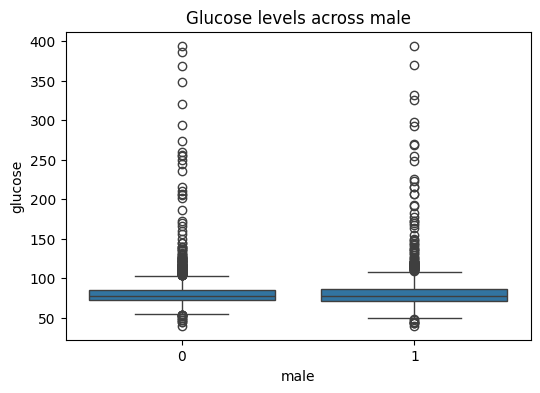

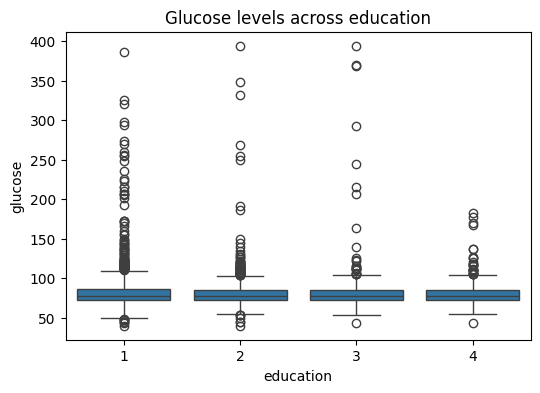

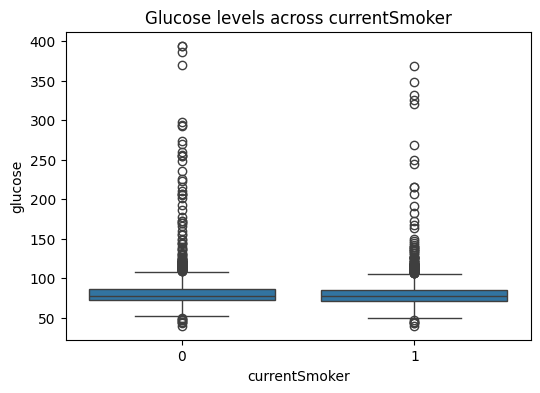

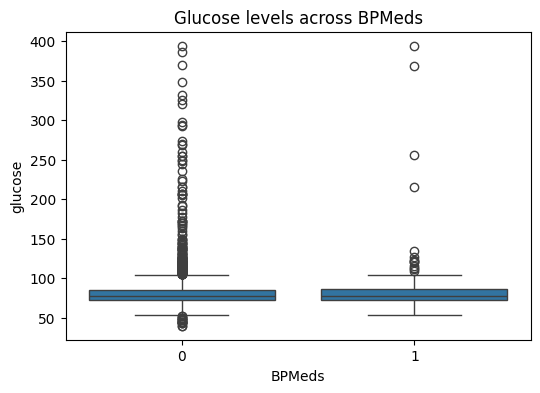

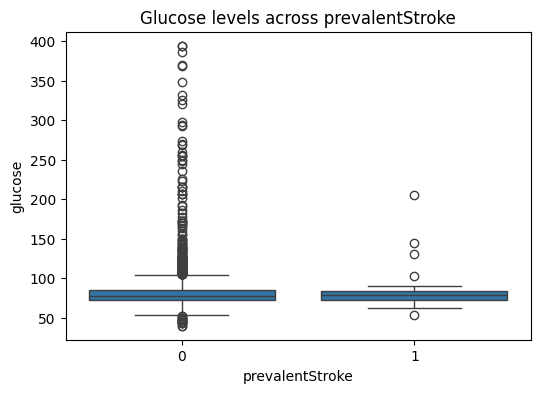

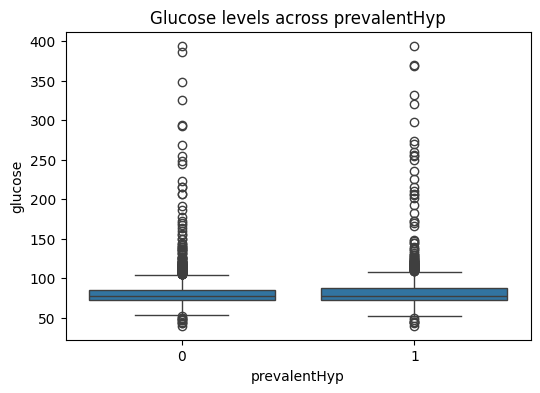

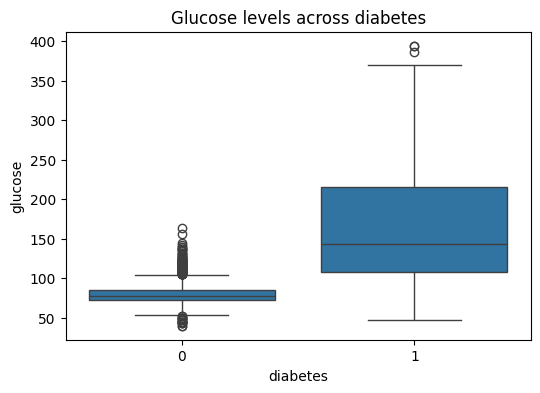

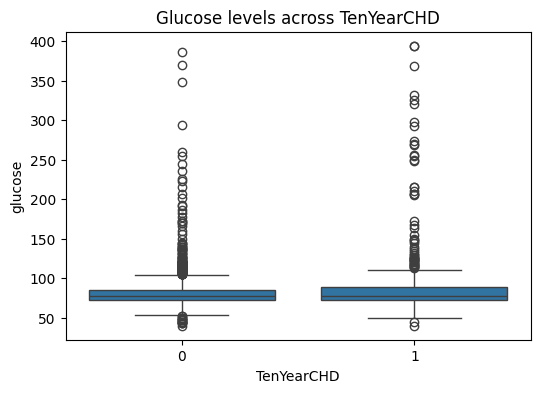

In [27]:
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=db[col], y=db['glucose'])
    plt.title(f'Glucose levels across {col}')
    plt.show()

***Selected features are : [ Diabetes , age , sysBP , prevalentHyp , BMI ] since these feature shows a moderate to strong correlation with column glucose***

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#feature engineering 
# numerical features need feature scaling 
features = ['age', 'sysBP', 'BMI', 'prevalentHyp', 'diabetes']
target = 'glucose'
X=db[features]
y=db[target]
numerical_features = ['age','sysBP','BMI']
scalar=StandardScaler()
X[numerical_features] = scalar.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

def check_accuracy(name ,y_pred):
    print(name,":")
    print('r2 Score:', r2_score(y_test, y_pred) )
    print('MAE:',mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

#linear_regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1=lr.predict(X_test)
check_accuracy("Linear Regression" ,y_pred1)

# Decision tree 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred2=dt.predict(X_test)
check_accuracy('Decision Tree',y_pred2)

#random forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred3=rf.predict(X_test)
check_accuracy('Random forest Model',y_pred3)




C:\Users\ASUS\AppData\Local\Temp\ipykernel_17100\3503130705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scalar.fit_transform(X[numerical_features])


Linear Regression :
r2 Score: 0.42776765832337993
MAE: 10.195865971850308
RMSE: 17.79037012341685

Decision Tree :
r2 Score: -0.12100019077223001
MAE: 15.596698113207546
RMSE: 24.900130711182268

Random forest Model :
r2 Score: 0.4091378191066317
MAE: 11.181768867924527
RMSE: 18.077646104491738



***Lets perform the classification Modeling***

In [35]:
def label_glucose(glucose):
    if glucose < 100:
        return "Normal"
    elif glucose < 126:
        return "Prediabetic"
    else:
        return "Diabetic"

db['glucose_label'] = db['glucose'].apply(label_glucose)

In [47]:
db['glucose_label']

0            Normal
1            Normal
2            Normal
3       Prediabetic
4            Normal
           ...     
4235         Normal
4236         Normal
4237    Prediabetic
4238         Normal
4239         Normal
Name: glucose_label, Length: 4239, dtype: object

In [48]:
db.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,glucose_label
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,Normal
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,Normal
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,Normal
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,Prediabetic
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,Normal


In [49]:
# Example feature selection
features = ['age', 'BMI', 'diabetes','prevalentHyp', 'sysBP']
X = db[features]
y = db['glucose_label']

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
 

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


📊 Logistic Regression Evaluation:
Accuracy: 91.62735849056604 %

📊 Decision Tree Evaluation:
Accuracy: 85.14150943396226 %

📊 Random Forest Evaluation:
Accuracy: 91.15566037735849 %


***Summary***
The goal of this project was to classify glucose levels into Normal, Prediabetic, and Diabetic categories using patient health records from the framingham.csv dataset.

Steps completed :

1)Data cleaning-Handled missing values and ensured correct data formats.

2)Exploration & Visualization:

   ->Plotted glucose distribution.

   ->Visualized related health indicators (BMI, age, sysBP, etc.)

3)Model Training: Trained three classifiers and Three regression models :

 Linear regression 

 Logistic Regression

 Decision Tree

 Random Forest

4)Classification accuracy > 90% indicates excellent predictive potential using only five features.

***Insights :***

    - Logistic Regression, though simple, worked best — suggesting glucose class can be predicted via linear relationships in the data.
    
    
    - Decision Tree is interpretable but prone to overfitting; Random Forest balances interpretability and robustness.

    
    - BMI, age, and systolic BP are key early warning signs for elevated glucose — useful for screening patients without lab results.